# Import Library

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import balanced_accuracy_score, precision_recall_fscore_support, classification_report
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Preprocessing

Load Data

In [13]:
data = pd.read_csv("Cleaned_Apparel.csv")

Encode productDisplayName to Numerical

In [14]:
data['productDisplayName'] = data['productDisplayName'].astype(str)
encoder = LabelEncoder()
data['productDisplayName'] = encoder.fit_transform(data['productDisplayName'])

Categorical Columns Encoding

In [15]:
categorical_columns = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage', 'Emotion_Category']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

Scale Numerical Columns

In [16]:
scaler = StandardScaler()
numerical_columns = ['year', 'id_x', 'id_y']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

Separate Features and Target

In [17]:
X = data.drop(columns=['Emotion_Category'])
y = data['Emotion_Category']

Split Into Training and Test Sets

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Convert Target to One-hot Encoding

In [19]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Model Building

In [20]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_train_categorical.shape[1], activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [21]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Training

In [22]:
history = model.fit(X_train, y_train_categorical,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    verbose=1)

Epoch 1/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2359 - loss: 955.3755 - val_accuracy: 0.2703 - val_loss: 1.6647
Epoch 2/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2840 - loss: 4.0975 - val_accuracy: 0.2703 - val_loss: 1.6126
Epoch 3/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2815 - loss: 2.1616 - val_accuracy: 0.2703 - val_loss: 1.5924
Epoch 4/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2841 - loss: 2.1278 - val_accuracy: 0.2703 - val_loss: 1.5826
Epoch 5/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2842 - loss: 1.8890 - val_accuracy: 0.2703 - val_loss: 1.5764
Epoch 6/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2872 - loss: 1.6022 - val_accuracy: 0.2703 - val_loss: 1.5728
Epoch 7/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2819 - loss: 1.6747 - val_accuracy: 0.2703 - val_loss: 1.5703
Epoch 8/30
505/505 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2830 - loss: 1.6560 - val_accuracy: 

# Model Evaluation

Predict on Test Data

In [23]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

balanced_acc = balanced_accuracy_score(y_test, y_pred)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

report = classification_report(y_test, y_pred)

158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [24]:
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nClassification Report:\n", report)

Balanced Accuracy: 0.1667
Precision: 0.0772
Recall: 0.2778
F1-score: 0.1208

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1166
           1       0.00      0.00      0.00      1092
           2       0.00      0.00      0.00        34
           3       0.28      1.00      0.43      1402
           4       0.00      0.00      0.00       341
           5       0.00      0.00      0.00      1012

    accuracy                           0.28      5047
   macro avg       0.05      0.17      0.07      5047
weighted avg       0.08      0.28      0.12      5047



The model's performance is poor, as indicated by a low balanced accuracy of 0.1667, precision of 0.0772, recall of 0.2778, and F1-score of 0.1208, with the classification report showing it only performs well for class 3 while completely failing to predict other classes. This suggests significant issues, likely due to class imbalance or the model overfitting to the dominant class, as precision, recall, and F1-scores for most classes are 0. The weighted averages also confirm poor generalization across all classes. To improve, techniques like addressing class imbalance through oversampling, undersampling, or class weighting, refining the model architecture, optimizing hyperparameters, and enhancing feature engineering are recommended.

# Visualize Training Performance

Plot Training and Validation Accuracy

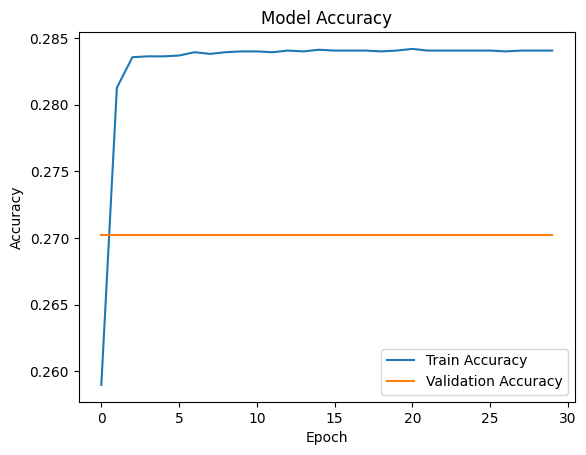

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Plot training and Validation Loss

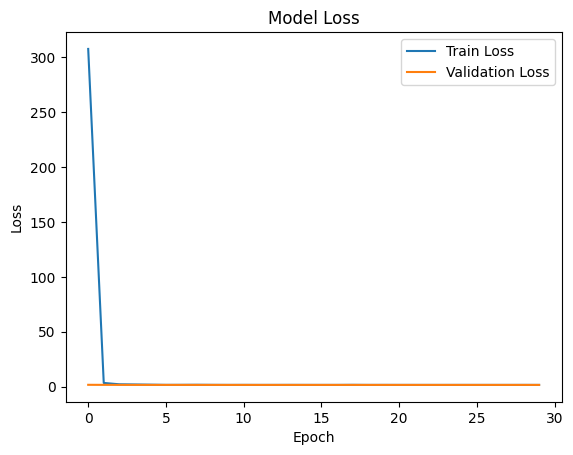

In [26]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()